In [1]:
import sympy as sp
import symbtools as st
%load_ext ipydex.displaytools
from sympy.interactive import printing
printing.init_printing()

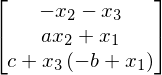

---


---


In [2]:
x1, x2, x3 = xx = sp.symbols('x1:4')
a, b, c = sp.symbols('a, b, c')

f = sp.Matrix([-x2 -x3, x1 + a*x2, c + x3*(x1-b)])  ##:
y = h = x3  ##:

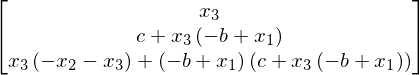

---


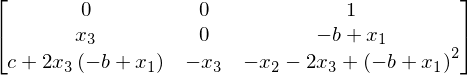

---


In [3]:
q = sp.Matrix([h, st.lie_deriv(h, f, xx), st.lie_deriv(h, f, xx, 2)]) ##:

Q1 = q.jacobian(xx) ##:

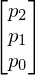

---


In [4]:
kk = st.symb_vector("p2, p1, p0") ##:

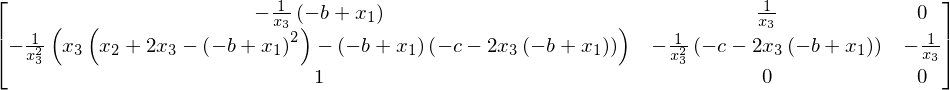

---


In [5]:
Q1inv = Q1.inverse_ADJ() ##:

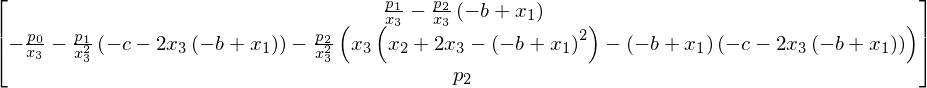

---


In [6]:
ll = Q1inv*kk ##:

Das ist die Beobachter-Verstärkung

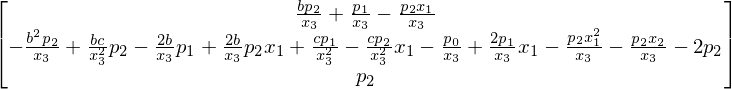

In [7]:
ll.simplify()

ll.expand()

c) Beobachtbarkeitsnormalform

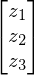

---


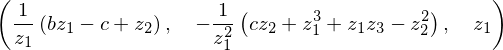

---


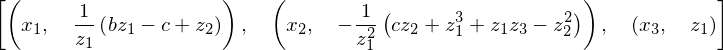

---


In [8]:
zz = st.symb_vector("z1:4") ##:

res = sp.solve(q-zz, xx)[0] ##:

rplmts = st.lzip(xx, res) ##:

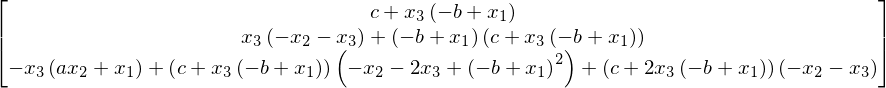

---


In [9]:
z_dot_tmp = Q1*f  ##:

In [10]:
z_dot = z_dot_tmp.subs(rplmts)

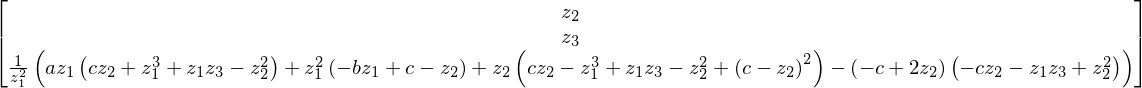

In [11]:
z_dot.simplify()
z_dot

Bonus 1:  Simulation des Systems

In [12]:
parvals = [(a, 0.55), (b, 4), (c, 2)]
fn = f.subs(parvals)

rhs1 = st.expr_to_func(xx, fn)

def rhs_sim(state, t):
    return np.array(rhs1(*state))

In [13]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
tt = np.linspace(0, 100, 10000)

In [15]:
res = odeint(rhs_sim, [1, 1, 1], tt)

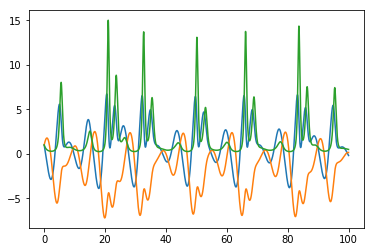

In [16]:
plt.plot(tt, res[:, 0])
plt.plot(tt, res[:, 1])
plt.plot(tt, res[:, 2])
plt.show()

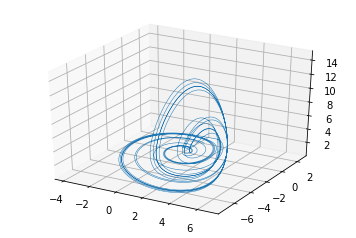

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

xs, ys, zs = res.T


ax.plot(xs, ys, zs, lw=0.5)
plt.show()

Bonus 2: Simulation des Beobachters

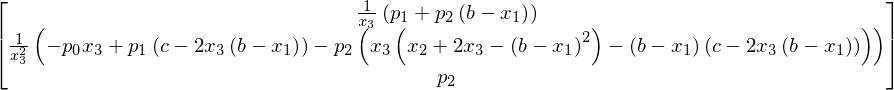

In [18]:
# Das ist die Beobachter-Verstärkung
ll

In [19]:
coeffs = np.polynomial.polynomial.polyfromroots([-1, -2, -3]) ##:
coeff_rplmts = st.lzip(kk, coeffs[:-1]) ##:

coeffs := array([  6.,  11.,   6.,   1.])

---


---


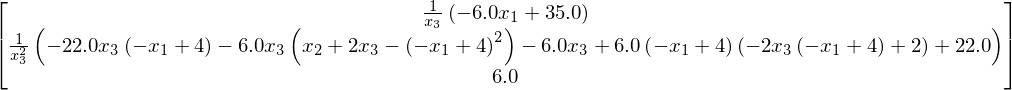

---


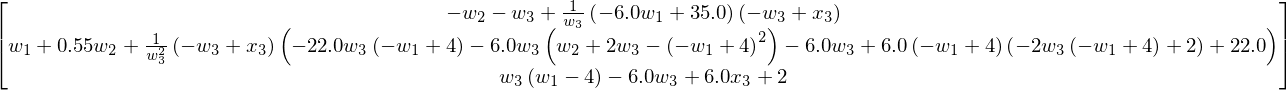

---


In [20]:
# Beobachter-Verstärkung numerisch:

lln = ll.subs(parvals + coeff_rplmts) ##:

# Symbole für Zustand des Beobachters
w1, w2, w3 = ww = st.symb_vector("w1:4")

rpl_xx_ww = st.lzip(xx, ww)

# Rechte Seite des Beobachters:

         # Strecke         +  Beob.verstärkung  *  Differenz der Ausgänge
f_obs = fn.subs(rpl_xx_ww) + lln.subs(rpl_xx_ww)*(h - h.subs(rpl_xx_ww)) ##:



f_obs_func = st.expr_to_func([w1, w2, w3, x3], f_obs)

In [21]:
n = len(f)  # Zustandsdimension des Originalsystems
def rhs_complete_system(state, t):
    # Zustand Strecke
    x1, x2, x3 = state[:n]
    
    # Zustand der Kopie der Strecke 
    w1, w2, w3 = state[n:]
    
    xxdot = rhs1(x1, x2, x3)
    
    wwdot = f_obs_func(w1, w2, w3, x3)
    
    return np.concatenate((xxdot, wwdot))

In [22]:
state0 = [1, 1, 1,  5, 1, 1]


# kürzere Simulationszeit, damit man mehr sieht
tt = np.linspace(0, 10, 1000)


In [23]:
res = odeint(rhs_complete_system, state0, tt[:])

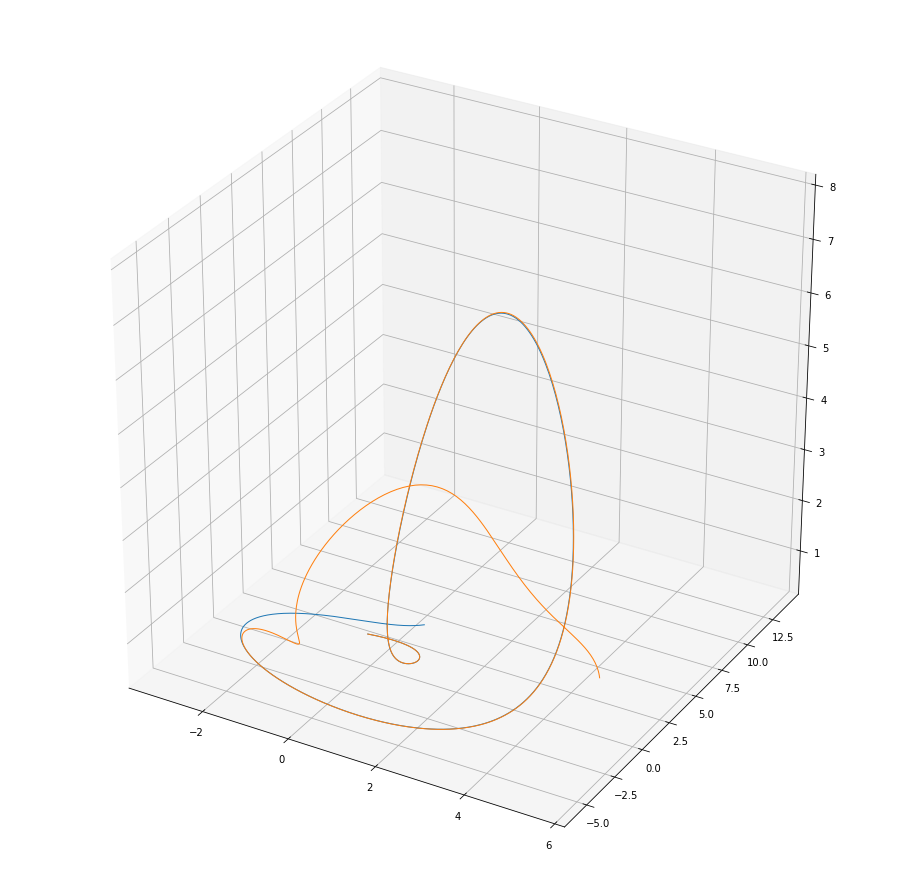

In [24]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

xs, ys, zs = res[:, :n].T

ax.plot(xs, ys, zs, lw=1)

w1, w2, w3 = res[:, n:].T
ax.plot(w1, w2, w3, lw=1)

plt.show()

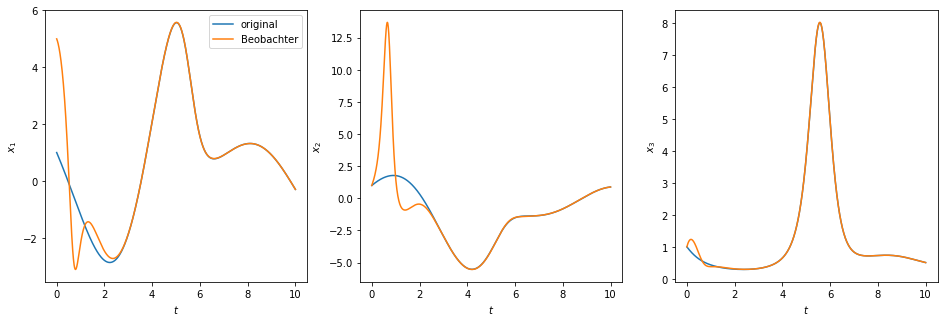

In [25]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(tt, xs, label="original")
plt.plot(tt, w1, label="Beobachter")
plt.ylabel("$x_1$"); plt.xlabel("$t$")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(tt, ys)
plt.plot(tt, w2)
plt.ylabel("$x_2$"); plt.xlabel("$t$")
plt.subplot(1, 3, 3)
plt.plot(tt, zs)
plt.plot(tt, w3)
plt.ylabel("$x_3$"); plt.xlabel("$t$")
plt.show()